## Load the engineered data

In [1]:
import pandas as pd
data_path = "/Users/agalyaayyadurai/PycharmProjects/Customer-Value-Insights/data/processed/engineered_data.csv"
data = pd.read_csv(data_path)
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spend,Recency_Group
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,3,11,1,67,0,1617,Less Recent
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,3,11,0,70,2,27,Recent
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,3,11,0,59,0,776,Recent
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,3,11,0,40,1,53,Recent
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,3,11,0,43,1,422,Not Recent


## Prepare data for clustering

In [28]:
# Select features for clustering
features = data[['Age', 'Total_Spend', 'Total_Children']]

## Develop clustering model

### Elbow method to find optimal K

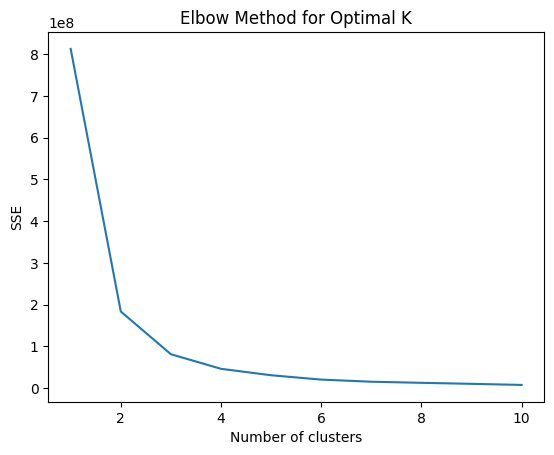

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal K')
plt.show()


## Fit the final model and evaluate clustering

In [32]:
# Fit the final model
optimal_k = 3  # Silhouette score was high when k is 2, therefore chosen 2 here
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(features)
clusters = kmeans.predict(features)


# Add cluster labels to the data
data['cluster'] = clusters

# Evaluate clustering
silhouette_avg = silhouette_score(features, clusters)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.6700180522575183


## Visualise clusters

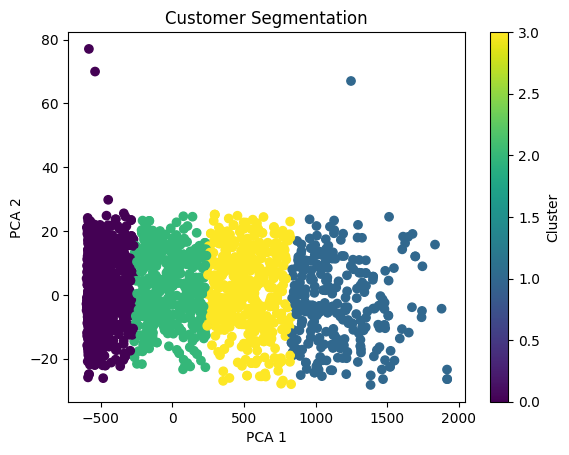

In [31]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(features)

# Plot the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Customer Segmentation')
plt.colorbar(label='Cluster')
plt.show()

## Save the segmented data

In [34]:
# Save the segmented data
segmented_data_path = "/Users/agalyaayyadurai/PycharmProjects/Customer-Value-Insights/data/processed/segmented_data.csv"
data.to_csv(segmented_data_path, index=False)
